# **Lab Excercise-01:Building and Training Artificial Neural Network**

* Created By : Blessy Louis (2348416)
* Created On : 11.07.2024
* Submitted On:13.07.2024

**Dataset Description**

- **Age:** The age of the patient.
- **Duration:** The duration of the migraine attack (typically in hours or days).
- **Frequency:** How often the patient experiences migraines (e.g., number of attacks per month).
- **Location:** The typical location of the migraine pain (e.g., unilateral, bilateral, etc.).
- **Character:** The nature or quality of the pain (e.g., throbbing, constant, etc.).
- **Intensity:** The intensity of the pain, usually on a scale from 1 to 10.
- **Nausea:** Whether the patient experiences nausea during the migraine (binary: 0 for no, 1 for yes).
- **Vomit:** Whether the patient experiences vomiting during the migraine (binary: 0 for no, 1 for yes).
- **Phonophobia:** Whether the patient experiences sensitivity to sound (binary: 0 for no, 1 for yes).
- **Photophobia:** Whether the patient experiences sensitivity to light (binary: 0 for no, 1 for yes).
- **Visual:** Whether the patient experiences visual disturbances (binary: 0 for no, 1 for yes).
- **Sensory:** Whether the patient experiences sensory disturbances (binary: 0 for no, 1 for yes).
- **Dysphasia:** Whether the patient experiences difficulties with speech (binary: 0 for no, 1 for yes).
- **Dysarthria:** Whether the patient experiences slurred speech (binary: 0 for no, 1 for yes).
- **Vertigo:** Whether the patient experiences dizziness (binary: 0 for no, 1 for yes).
- **Tinnitus:** Whether the patient experiences ringing in the ears (binary: 0 for no, 1 for yes).
- **Hypoacusis:** Whether the patient experiences reduced hearing ability (binary: 0 for no, 1 for yes).
- **Diplopia:** Whether the patient experiences double vision (binary: 0 for no, 1 for yes).
- **Defect:** Whether the patient experiences visual field defects (binary: 0 for no, 1 for yes).
- **Ataxia:** Whether the patient experiences lack of muscle coordination (binary: 0 for no, 1 for yes).
- **Conscience:** Whether the patient experiences altered states of consciousness (binary: 0 for no, 1 for yes).
- **Paresthesia:** Whether the patient experiences tingling or pricking sensations (binary: 0 for no, 1 for yes).
- **DPF:** The Discomfort Pain Frequency score (a custom metric related to discomfort and pain frequency).
- **Type:** The type of migraine the patient is experiencing, which is the target variable for classification. Possible values include:
  - **Typical aura with migraine**
  - **Migraine without aura**
  - **Familial hemiplegic migraine**
  - **Typical aura without migraine**
  - **Basilar-type aura**

### Objective

The objective is to build, train, and evaluate an Artificial Neural Network (ANN) for classifying the type of migraine based on the provided features.

## Loading and Pre-processing dataset

In [1]:
pip install tensorflow


Import Dataset

### Explanation of the Libraries and Functions:

1. **pandas**:
   - A powerful data manipulation and analysis library for Python. It provides data structures like DataFrames, which are essential for handling and analyzing tabular data.

2. **numpy**:
   - A fundamental package for numerical computing in Python. It supports arrays, matrices, and various mathematical functions to operate on these data structures.

3. **train_test_split** (from `sklearn.model_selection`):
   - A function used to split a dataset into training and testing sets. This is essential for evaluating the performance of machine learning models on unseen data.

4. **StandardScaler** (from `sklearn.preprocessing`):
   - A preprocessing tool used to standardize features by removing the mean and scaling to unit variance. This ensures that each feature contributes equally to the model's performance.

5. **to_categorical** (from `tensorflow.keras.utils`):
   - A function that converts class vectors (integers) into binary class matrices. This is used for converting categorical labels into a format suitable for training a neural network.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

Load Dataset

In [3]:
# Load the dataset
df = pd.read_csv('data.csv')

print("First five rows of the dataset\n",df.head())
print("Information of the dataset\n",df.info())
print("Descriptive Statistics of the dataset\n",df.describe())
print("Number of null values in the dataset",df.isnull().sum())

First five rows of the dataset
    Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   

   Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
0            1            1  ...        0         0           0         0   
1            1            1  ...        1         0           0         0   
2            1            1  ...        0         0           0         0   
3            1            1  ...        1         0           0         0   
4            1            1  ...        0         0           0         0   

   Defect  Ataxia  Conscience  Pares

Splitting the dataset

In [11]:
# Assume the last column is the target variable and the rest are features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Standardizing

In [12]:
# Normalize the feature values to the range [0, 1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Building ANN

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Add layers to the model
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer and hidden layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification



Compiling the ANN

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Training ANN

In [15]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
8/8 [==============================] - 1s 39ms/step - loss: 1.8964 - accuracy: 0.2539 - val_loss: 1.8798 - val_accuracy: 0.3438
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 1.7631 - accuracy: 0.3633 - val_loss: 1.7633 - val_accuracy: 0.4844
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 1.6428 - accuracy: 0.4414 - val_loss: 1.6479 - val_accuracy: 0.5156
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 1.5279 - accuracy: 0.5195 - val_loss: 1.5434 - val_accuracy: 0.6094
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4253 - accuracy: 0.6016 - val_loss: 1.4496 - val_accuracy: 0.6875
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 1.3295 - accuracy: 0.6562 - val_loss: 1.3619 - val_accuracy: 0.7188
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 1.2399 - accuracy: 0.7266 - val_loss: 1.2817 - val_accuracy: 0.7500
Epoch 8/50
8/8 [=================

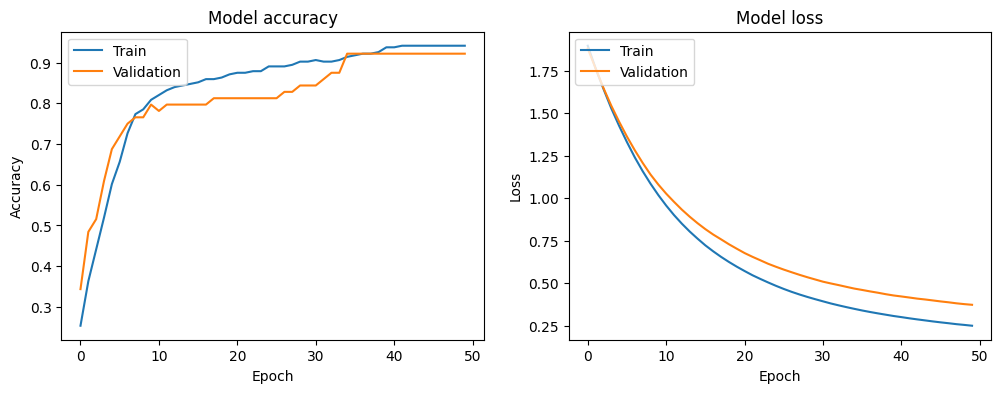

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Evaluating The ANN

In [18]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')
print(f'Test loss: {loss}')

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Convert predictions and actual labels from one-hot encoded format to integer format
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test_int, y_pred_int, target_names=label_encoder.classes_)
print(class_report)


3/3 [==============================] - 0s 7ms/step - loss: 0.3305 - accuracy: 0.9000
Test accuracy: 0.8999999761581421
Test loss: 0.33050817251205444
3/3 [==============================] - 0s 3ms/step
[[ 4  1  0  0  0  0  1]
 [ 0  3  0  0  0  0  0]
 [ 0  0 12  0  0  1  0]
 [ 0  0  1  3  0  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  2  0  0  0 47  0]
 [ 0  0  0  0  0  0  3]]
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         6
 Familial hemiplegic migraine       0.50      1.00      0.67         3
        Migraine without aura       0.92      0.92      0.92        13
                        Other       1.00      0.75      0.86         4
 Sporadic hemiplegic migraine       0.00      0.00      0.00         2
   Typical aura with migraine       0.94      0.96      0.95        49
Typical aura without migraine       0.75      1.00      0.86         3

                     accuracy                           0.90

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


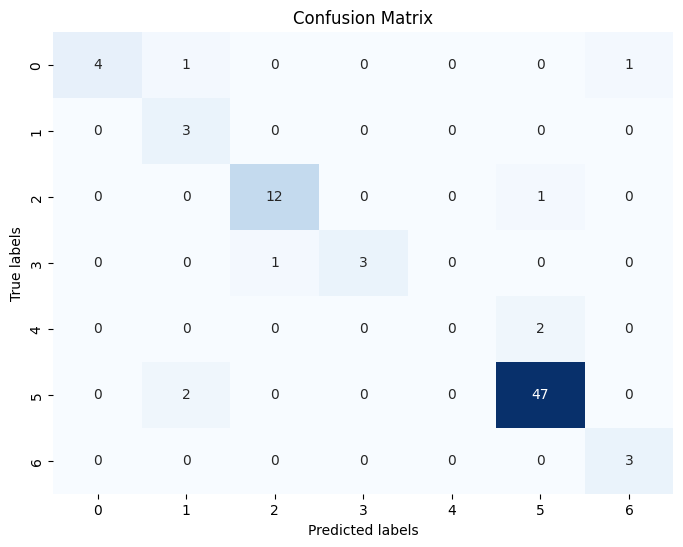

In [20]:
import seaborn as sns
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_int, y_pred_int)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()





save the model

In [ ]:
# Save the model
model.save('my_shallow_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('my_shallow_model.h5')

# Use the loaded model to make predictions
y_loaded_pred = (loaded_model.predict(X_test) > 0.5).astype("int32")



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


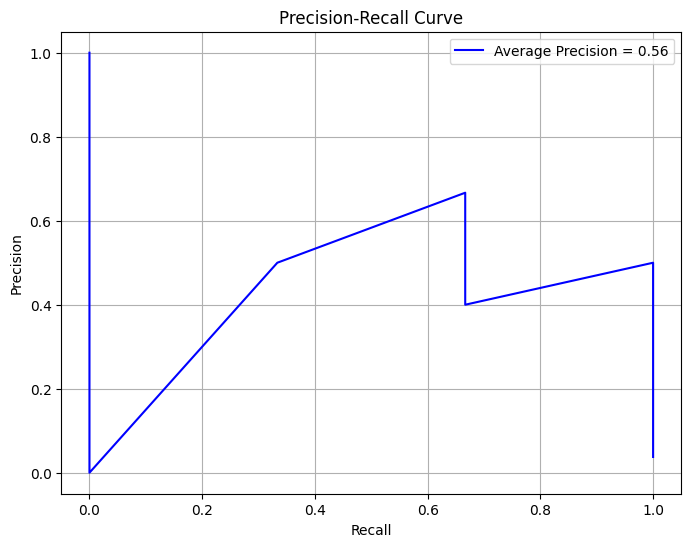

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score


# Compute Precision-Recall curve and average precision score
precision, recall, thresholds = precision_recall_curve(y_test[:, 1], y_pred[:, 1])
avg_precision = average_precision_score(y_test[:, 1], y_pred[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'Average Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


This  is a precision-recall curve. This is a graph that shows the relationship between two metrics that are commonly used to evaluate the performance of a binary classification model: precision and recall.

* Precision is the proportion of positive predictions that are actually correct. In other words, it tells you how often a model correctly identifies a positive instance.
* Recall is the proportion of actual positive instances that are identified correctly by the model. In other words, it tells you what proportion of the actual positive cases the model identified.

The ideal precision-recall curve would be a diagonal line going from the top-left corner (where precision and recall are both 1) to the bottom-right corner. This would indicate that the model is perfect at classifying both positive and negative instances.

The curve in the graph is not perfect, but it does show a trade-off between precision and recall. As the recall of the model increases (i.e., it identifies more positive instances), the precision decreases (i.e., some of the identified positive instances are actually negative). This is a common trade-off in machine learning models.

The average precision shown in the image is 0.56. This is a measure of the overall performance of the model across all possible thresholds. It can be interpreted as the mean of the precision values obtained for all possible recall values.



<ipython-input-25-b995ad9a8975>:3: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


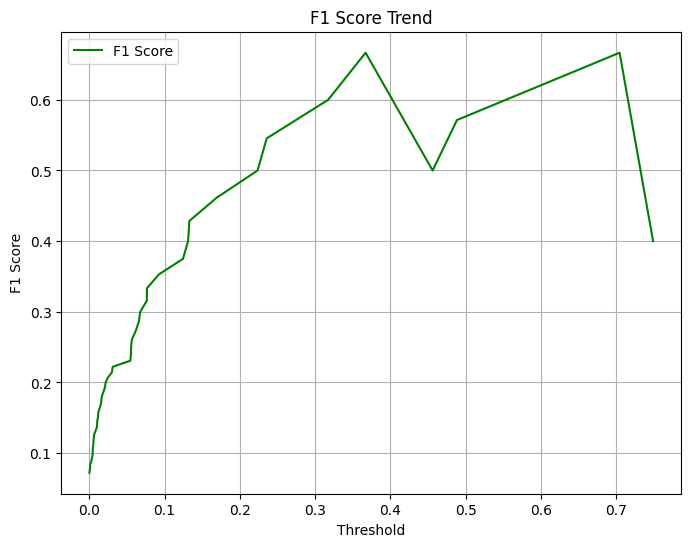

In [25]:
# Compute F1 Scores
precision, recall, thresholds = precision_recall_curve(y_test[:, 1], y_pred[:, 1])
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot F1 Score Trend
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], color='g', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Trend')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


it is  an F1-score trend. The F1 score is a way of summarizing both precision and recall into a single metric. It is the harmonic mean of precision and recall, which means it takes the  balance between the two metrics into account.

In this graph, the F1-score is increasing as the threshold increases. This means that the model is getting better at correctly classifying both positive and negative instances as the threshold is increased. However, it is important to note that the F1-score does not tell you how well the model is performing at any specific threshold.

Here are some additional things to keep in mind when interpreting an F1-score trend:

* The F1-score is a good metric to use when you care about both precision and recall.
* The F1-score can be misleading if the class distribution is imbalanced. For example, if there are many more negative instances than positive instances, the F1-score may be high even if the model is not very good at classifying positive instances.
* The F1-score is just one metric, and it is important to consider other metrics as well when evaluating the performance of a model.

Overall, the F1-score trend in the image is a positive sign, but it is important to keep the limitations of this metric in mind.